<a href="https://colab.research.google.com/github/michaelchapa/dataMining_classification_decisionTree_naiveBayes/blob/develop/dataMining_classification_decisionTree_naiveBayes_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Classification using a Binary Decision Tree and Gaussian Naive Bayes algorithm</h1>
<h4>This is a small data-set of 11 records with 5 attributes.</h4>
<p><code>Age</code> and <code>Salary</code> have been descretized into categorical attributes.
<p><code>Department</code> is nominal and <code>Status</code> is ordinal.</p><p><code>Count</code> is numerical. </p>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from random import randrange
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB

data = [['department', 'status', 'age', 'salary', 'count'], 
    ['sales', 'senior', '31..35', '46k..50k', 30],
    ['sales', 'junior', '26..30', '26k..30k', 40],
    ['sales', 'junior', '31..35', '31k..35k', 40],
    ['systems', 'junior', '21..25', '46k..50k', 20],
    ['systems', 'senior', '31..35', '66k..70k', 5],
    ['systems', 'junior', '26..30', '46k..50k', 3],
    ['systems', 'senior', '41..45', '66k..70k', 3],
    ['marketing', 'senior', '36..40', '46k..50k', 10],
    ['marketing', 'junior', '31..35', '41k..45k', 4],
    ['secretary', 'senior', '46..50', '36k..40k', 4],
    ['secretary', 'junior', '26..30', '26k..30k', 6]]

df1 = pd.DataFrame(data[1:], columns = data[0])

<h2>Generating a Binary Tree Classifier using Gini Index</h2>
<p>Because the data was sparse, each row is duplicated by their <code>Count</code> value.</p><p> <code>Salary</code> and <code>Age</code> were de-discretized and an in-range random integer value was assigned for each of their corresponding ranges. </p>
<p><code>Department</code> and <code>Status</code> were encoded based on the count of different values for the attribute.</p>
<h3>A plot of a Binary Tree Classifier is printed below.</h3>
<p>A prediction is made on an unknown tuple composed of: <code>[[3, 28, 50]]</code>.<br>3 = 'Department = Systems', 28 = Age, 50 = Salary (in thousands).</p>
<h3>The predicted class is '<code>junior</code>' (printed below)</h3>
<p><em>For context on functionality, all sub-routines have notes before the function.</em></>

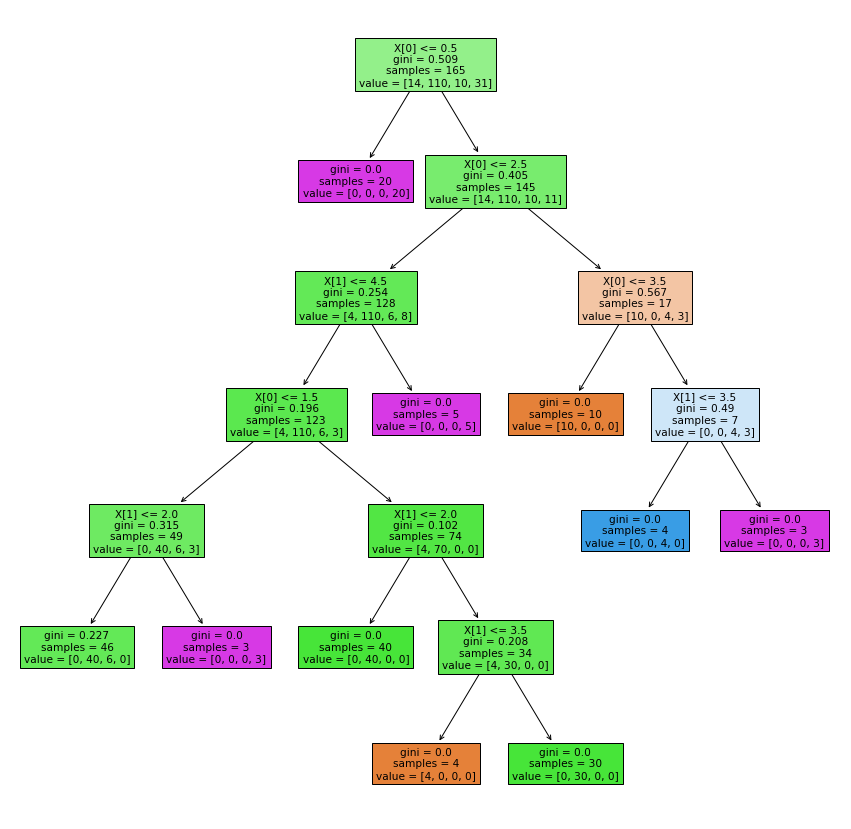

junior


In [7]:
####################### expandData_byCount ################################
# Purpose: 
#   Takes each instance and get's integer value of 'Count' attribute
#   Appends instance to a new dataFrame times 'Count' value
# Parameters:
#   I       DataFrame       data
# Returns:
#   DataFrame
# Notes:
#   None
def expandData_byCount(df):
    df2 = pd.DataFrame()
    
    for instance in df.iterrows():
        count = instance[1][4]
        
        for x in range(count):
            df2 = df2.append(instance[1], ignore_index = True)
            
    return df2


######################## encodeCategorical #################################
# Purpose:
#   Encodes Categorical attributes (features) into one-of-kinds. 
#   If an attribute has three values 'A', 'B', 'C'; it encodes
#   'A' as 0, 'B' as 1, 'C' as 2. 
# Parameters:
#   I       DataFrame       data
#   I       String || None  columnToDrop    attribute to remove from data
#   I       List || None    toEncode               
# Returns:
#   DataFrame with Encoded attributes and non-categorical attributes.
# Notes:
#   The Encode section appends the encoded values,
#   the Encoded column will be named '{attributeName}_code'.
def encodeCategorical(data, columnToDrop, toEncode):
    lb_make = LabelEncoder() # Does the Encoding heavy-lifting
    
    if toEncode != None:
        categoricalAttr = toEncode
    else:
        obj_df = data.select_dtypes(include = ['object']).copy()
        categoricalAttr = list(obj_df.columns)
    
    if columnToDrop != None:
        data = data.drop(columns = columnToDrop)
    
    # Encode
    for attr in categoricalAttr:
        data[attr + '_code'] = lb_make.fit_transform(data[attr])
        
    # Remove non-encoded categorical attributes
    data = data.drop(columns = categoricalAttr)
    
    return data


####################### create_displayDecisionTree #########################
# Purpose:
#   Creates a decision tree classifier, displays the tree, prints a prediction
# Parameters:
#   I       DataFrame       data
#   I       String          target      Target Class attribute name
# Returns:
#   DecisionTreeClassifier
# Notes:
#   The target class should be a column name of the dataFrame
def create_displayDecisionTree(data, target):
    plt.figure(figsize=(15, 15)) 
    clf = DecisionTreeClassifier(random_state = 0).fit( \
                                 data.drop(columns = target), data[target])
    plot_tree(clf, filled = True)
    plt.show()
    
    if clf.predict([[3, 28, 50]]) == 0:
        print('junior')
    else:
        print('senior')
        

df2 = expandData_byCount(df1)
df2 = encodeCategorical(df2, 'count', None)
create_displayDecisionTree(df2, 'department_code')

<h2>Generating a Classifier using Gaussian Naive Bayes algorithm</h2>
<p>Because the data was sparse, each row is duplicated by their <code>Count</code> value.</p><p> <code>Salary</code> and <code>Age</code> were de-discretized and an in-range random integer value was assigned for each of their corresponding ranges. </p>
<p><code>Department</code> is encoded based on the count of different values for the attribute.</p>
<p>A prediction is made on an unknown tuple composed of: <code>[[3, 28, 50]]</code>.<br>3 = 'Department = Systems', 28 = Age, 50 = Salary (in thousands).</p>
<h3>The predicted class is '<code>senior</code>' (printed below)</h3>
<p><em>For context on functionality, all sub-routines have notes before the function.</em></>

In [8]:
#################### preProcess_naiveBayes_classifier ######################
# Purpose:
#   Replicates rows based on their count. (see subRoutine expandData_byCount)
#   Encodes categorical data, takes discretized columns with ranges and
#   Populates each value with a random value from that range (inclusive)
#   Removes a specified column (school assignment request)
# Parameters:
#   I       DataFrame       data
#   I       String || None  columnToDrop    attribute to remove from data
# Returns:
#   DataFrame
# Notes:
#   None == NULL
def preProcess_naiveBayes_classifier(data, columnToDrop):
    data = expandData_byCount(data)
    
    # deRange age and salary columns
    ageList = []
    salaryList = []
    for instance in data.iterrows():
        age = instance[1]['age'] # 1st dimension value is dataFrame index
        salary = instance[1]['salary']
        
        age = tuple(map(int, age.split('..'))) # turns age into minMax tuple
        ageList.append(randrange(age[0], age[1], 1)) # randomize
        
        salary = tuple(salary.split('..'))
        salaryList.append(randrange(int(salary[0][:-1]), int(salary[1][:-1])))
        
    # replace all range values with numpy list
    data['age'] = ageList 
    data['salary'] = salaryList
    
    data = encodeCategorical(data, None, ['department'])
    
    if columnToDrop != None:
        data = data.drop(columns = columnToDrop)
        
    return data
    

################ create_test_naiveBayes_classifier #####################
# Purpose:
#   Trains a Classifier using Gaussian Naive Bayes algorithm, predicts a 
#   target class based on an arbitrary tuple.
# Parameters:
#   I       DataFrame       data
#   I       String          targetClass
# Returns:
#   GaussianNB classifier
# Notes:
#   yTrain is target class values and xTrain is independent attributes
def create_test_naiveBayes_classifier(data, targetClass):
    gnb = GaussianNB()
    
    xTrain = data.drop(columns = targetClass)
    yTrain = data[targetClass]
    
    gnb.fit(xTrain, yTrain)
    print(gnb.predict([[3, 28, 50]]))

    return


df3 = preProcess_naiveBayes_classifier(df1, 'count')
create_test_naiveBayes_classifier(df3, 'status')

['senior']
